<a href="https://colab.research.google.com/github/TanThinNguyen/protonx-dl-course/blob/master/Bai2/Bai2_Road_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/DL ProtonX

/content/drive/My Drive/DL ProtonX


In [ ]:
pwd

'/content/drive/My Drive/DL ProtonX'

In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

In [ ]:
import wget
wget.download(link)

In [ ]:
data = "./Bai2/"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
# đường dẫn tới các data
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle  # dùng load data

In [ ]:
with open(train_link, mode="rb") as f:
    train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
    valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
    test = pickle.load(f)

In [ ]:
# Xem những thứ có bên trong object train
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
# Lấy ra features(ảnh) và labels(nhãn) của tập train data 
trainX = train["features"]
trainY = train["labels"]

In [ ]:
# kích thước của trainX
print(trainX.shape)
# kích thước 1 tấm ảnh
print(trainX[0].shape)

(34799, 32, 32, 3)
(32, 32, 3)


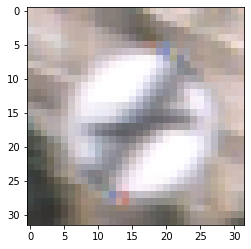

In [ ]:
# Hiển thị thử 1 ảnh
import matplotlib.pyplot as plt
plt.imshow(trainX[50])

In [ ]:
# Dùng tra nội dung tương ứng với mã nhãn
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
# Dùng để tráo vị trí ảnh và nhãn
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

End of no passing by vehicles over 3.5 metric tons


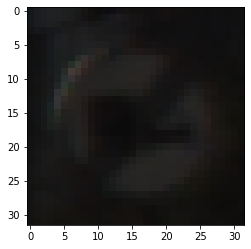

In [ ]:
plt.imshow(trainX[0])
print(classNames[trainY[0]]) 

In [ ]:
# Lấy ra features(ảnh) và labels(nhãn) của tập valid, test
# Bộ valid dùng xác thực lúc training, test để kiểm tra sau khi training xong
# nên ko cần tráo vị trí
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [ ]:
# Chuẩn hóa data, chuyển các datapoint thành các giá trị trong khoảng [0, 1]
# Để cho sự ảnh hưởng của mỗi datapoint đồng đều nhau, ko thiên vị về datapoint lớn
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# Chuẩn hóa nhãn thành one-hot vector
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
# Xem kết quả sau khi chuyển dạng one-hot
print(validY[0])
print(valid["labels"][0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]
41


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
# Khởi tạo model
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
# Shape của 1 bức ảnh đầu vào
shape = (width, height, 3)

In [ ]:
# 32 là số kernel, (3, 3) là kích thước kernel
model.add(Conv2D(32, (3,3), padding="same", input_shape=shape))
model.add(Activation("relu"))
# BatchNorm dùng để chuẩn hóa lại phân bố của data tương đồng vs input ban đầu (vì sau khi 
# qua các lớp convolution, activation thì phân bố của data thay đổi rất mạnh)
model.add(BatchNormalization()) 

model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())  

model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# duỗi ra thành vector
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()  # kiểm tra cấu trúc model hiện tại

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [ ]:
# Tăng cường data khi train
# Ta xoay, zoom, thay đổi kích cỡ để có nhiều đặc trưng hơn mà vẫn giữ nguyên nhãn
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01
num_epochs = 10
batch_size = 64

In [ ]:
# thuật toán tối ưu lost function SGD
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=num_epochs, verbose=1)

Start training...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
543/543 [==============================] - 24s 45ms/step - loss: 1.8786 - accuracy: 0.4578 - val_loss: 1.4631 - val_accuracy: 0.5819
Epoch 2/10
543/543 [==============================] - 24s 45ms/step - loss: 0.6698 - accuracy: 0.7799 - val_loss: 0.9246 - val_accuracy: 0.7451
Epoch 3/10
543/543 [==============================] - 24s 44ms/step - loss: 0.3115 - accuracy: 0.8970 - val_loss: 1.0761 - val_accuracy: 0.7379
Epoch 4/10
543/543 [==============================] - 24s 44ms/step - loss: 0.1885 - accuracy: 0.9371 - val_loss: 0.5143 - val_accuracy: 0.8605
Epoch 5/10
543/543 [==============================] - 24s 43ms/step - loss: 0.1279 - accuracy: 0.9585 - val_loss: 0.6432 - val_accuracy: 0.8322
Epoch 6/10
543/543 [==============================] - 24s 44ms/step - loss: 0.1049 - accuracy: 0.9657 - val_loss: 0.4369 - val_accuracy: 0.8959
Epoch 7/10
543/543 [======================

In [ ]:
# lưu lại model sau khi train xong
model.save("nguyennet.h5")

In [ ]:
# dự đoán trên tập test
idx = 750
result = model.predict(testX[idx:idx+1])
print(result)

[[2.16987019e-12 6.93897359e-13 3.71164960e-10 3.87677640e-10
  3.66284520e-12 1.80631132e-09 1.95049055e-12 1.67153232e-07
  5.21226728e-10 1.26255424e-08 9.99988556e-01 3.64920405e-09
  2.30350822e-10 3.43418515e-06 4.91435226e-10 2.32236951e-12
  2.82683345e-07 7.48014099e-06 4.96097434e-12 4.05746192e-09
  1.19364900e-08 5.57897062e-10 5.22782173e-09 2.24668018e-08
  1.40738725e-13 1.57821156e-09 1.08231844e-11 1.48885956e-11
  7.08087547e-11 1.75888091e-12 1.04070075e-07 1.44349750e-08
  1.25556406e-11 1.14509997e-12 1.51166822e-11 2.09868527e-13
  9.42852948e-11 2.81375877e-11 4.26919680e-11 6.10337475e-11
  6.56136742e-11 5.86997506e-10 6.60835919e-09]]


In [ ]:
import numpy as np
predic_label = np.argmax(result)
print(classNames[predic_label])

No passing for vehicles over 3.5 metric tons


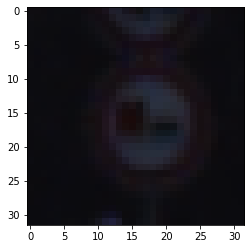

In [ ]:
plt.imshow(test["features"][idx])